#  Разработка модульного чат-бота с применением моделей 🤗 Transformers

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://huggingface.co/models?pipeline_tag=token-classification&sort=trending
* https://huggingface.co/docs/transformers/training
* https://github.com/seatgeek/thefuzz
* https://github.com/pytransitions/transitions
* https://github.com/gunthercox/ChatterBot
* https://deeppavlov.ai/

## Задачи для совместного разбора

1\. Рассмотрите типовые шаги для создания вопрос-ответного бота.

In [ ]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.0 MB/s eta 0:00:00


In [ ]:
from thefuzz import process

In [ ]:
db = {
    "film_director": {
        "Титаник": "Кэмерон",
        "Гибель «Титаника»": "Бейкер"
    }
}

In [ ]:
question = "Кто режиссер Титаника?"

def get_intent(question):
  return "film_director"

def ner(question):
  return "Титаника"

def get_answer(intent, entity):
  data = db[intent]
  most_likely_entity = process.extractOne(entity, data.keys())[0]
  return data[most_likely_entity]

In [ ]:
get_answer(
    get_intent(question),
    ner(question)
)

'Кэмерон'

2\. Обсудите возможности пакета `transitions` для создания машины состояний бота.

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите любую модель для распознавания именованных сущностей (NER) на русском языке из 🤗 Transformers. Напишите функцию `get_entity`. Продемонстрируйте пример работы на нескольких примерах из файлов с вопросами из каталога `qst_csv/questions`.

- [ ] Проверено на семинаре

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/NLP/12/questions/'

In [ ]:
q1 = pd.read_csv(path+'film_actors.csv')
q1.head(5)

,question
0,Кто сыграл в главных ролях Друзья
1,Кто в главных ролях Матрица
2,Кто играл главные роли в фильме Даун Хаус
3,Спартак актеры в главных ролях
4,Перечисли актеров которые играют главные роли ...


In [ ]:
q1 = q1['question'].to_list()

In [ ]:
q = 'question'

In [ ]:
q1 = pd.read_csv(path+'film_actors.csv')[q].to_list() #actors
q2 = pd.read_csv(path+'film_cameraman.csv')[q].to_list() #cameraman
q3 = pd.read_csv(path+'film_director.csv')[q].to_list() #director

In [ ]:
questions = q1 + q2 + q3

In [ ]:
from random import shuffle

In [ ]:
pip install natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 90.9 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a2750e597f40f7f9603a3f8ba0541ee7d8c733b947ac4e92f66062b7ac5a24c4
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=2345726eb98144f5e629b68d76032d2fd1b8b659e65f2865d2dd14efd0894e45
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built docopt intervaltree


In [ ]:
from natasha import Segmenter, NewsEmbedding, NewsNERTagger, Doc


segmenter = Segmenter()
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

In [ ]:
def get_entity(question: str) -> dict:
    """
    Пример question: "Кто является оператором фильма Андеграунд"
    Возвращает словарь следующего вида
        {
            "score": 0.8,
            "word": "фильма Андеграунд",
        }

    """

    doc = Doc(question)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)


    if doc.spans:
        span = doc.spans[0]
        return {
            "score": '~1.0',
            "word": span.text
        }

    return {"score": 0.0, "word": ""}

In [ ]:
for q in questions[9:14]:
    print()
    print(q)
    print(get_entity(q))
    print('-------------------------')


имена людей сыгравших в главных ролях сериале Беверли хиллз 90210
{'score': '~1.0', 'word': 'Беверли'}
-------------------------

Кто сыграл главные роли в сериале Декабристка
{'score': '~1.0', 'word': 'Декабристка'}
-------------------------

Главные актеры герои фильма Два отца и два сына
{'score': 0.0, 'word': ''}
-------------------------

Трансформеры 1 часть главные герои актеры
{'score': 0.0, 'word': ''}
-------------------------

Кто был в главных ролях Мистер и миссис Смит
{'score': '~1.0', 'word': 'Мистер'}
-------------------------


In [ ]:
shuffled = questions
shuffle(shuffled)
for q in shuffled[:5]:
    print()
    print(q)
    print(get_entity(q))
    print('-------------------------')



Как зовут актеров из Аватар
{'score': '~1.0', 'word': 'Аватар'}
-------------------------

Кто сыграл главные роли в фильме Леон
{'score': '~1.0', 'word': 'Леон'}
-------------------------

кто сыграл в Господин Никто
{'score': 0.0, 'word': ''}
-------------------------

Кто оператор в фильме Меланхолия
{'score': '~1.0', 'word': 'Меланхолия'}
-------------------------

Кто оператор сериала остаться в живых
{'score': 0.0, 'word': ''}
-------------------------


на этих примерах видно


> имена людей сыгравших в главных ролях сериале Беверли хиллз 90210\
> {'score': '~1.0', 'word': 'Беверли'}

> Главные актеры герои фильма Два отца и два сына\
> {'score': 0.0, 'word': ''}


что модель ошибается и не выдает 100% результат, иногда есть ошибки с тем что не берет второе слово названия

In [ ]:
import re

In [ ]:
def clean_entity(raw: str) -> str:
    raw = raw.strip(' .?!"')

    # Удалим стоп-слова в начале
    raw = re.sub(r'^(всо\s+)?(фильме|фильм|сериале|сериал|продюсер|продюсером|оператором|оператор|главных|героев|ролях)\s+', '', raw, flags=re.IGNORECASE)

    # Обрезаем лишнее в конце — если пошли служебные слова
    raw = re.split(r'\b(продюсер|продюсировал|оператор|актер|роли|герои|главные)\b', raw, flags=re.IGNORECASE)[0]

    return raw.strip(' .?!"')


def get_entity(question: str) -> dict:
    # 1. патерны в конце предложения
    patterns = [
        r'в главных ролях (.+)',
        r'в фильме (.+)',
        r'фильма (.+)',
        r'в сериале (.+)',
        r'сериале (.+)',
        r'фильм (.+)',
        r'сериал (.+)',
        r'оператором (.+)',
        r'оператор (.+)',
        r'продюсировал (.+)',
        r'продюсер (.+)',
        r'продюсером (.+)'
    ]
    for pattern in patterns:
        match = re.search(pattern, question, re.IGNORECASE)
        if match:
            raw_entity = match.group(1)
            return {"score": 1.0, "word": clean_entity(raw_entity)}

    # 2. патерны в начале предложения
    start_match = re.match(r'^(.+?)\s+(главные|актеры|герои|роли)\b', question, re.IGNORECASE)
    if start_match:
        raw_entity = start_match.group(1)
        return {"score": 1.0, "word": clean_entity(raw_entity)}

    # 3. Natasha
    doc = Doc(question)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)

    if doc.spans:
        span = doc.spans[0]
        entity = question[span.start:span.stop]
        return {"score": 1.0, "word": clean_entity(entity)}

    return {"score": 0.0, "word": ""}


In [ ]:
for q in q1[9:14]:
    print()
    print(q)
    print(get_entity(q))
    print('-------------------------')


имена людей сыгравших в главных ролях сериале Беверли хиллз 90210
{'score': 1.0, 'word': 'Беверли хиллз 90210'}
-------------------------

Кто сыграл главные роли в сериале Декабристка
{'score': 1.0, 'word': 'Декабристка'}
-------------------------

Главные актеры герои фильма Два отца и два сына
{'score': 1.0, 'word': 'Два отца и два сына'}
-------------------------

Трансформеры 1 часть главные герои актеры
{'score': 1.0, 'word': 'Трансформеры 1 часть'}
-------------------------

Кто был в главных ролях Мистер и миссис Смит
{'score': 1.0, 'word': 'Мистер и миссис Смит'}
-------------------------


In [ ]:
shuffled = questions
shuffle(shuffled)
for q in shuffled[:5]:
    print()
    print(q)
    print(get_entity(q))
    print('-------------------------')



Кто оператор в фильме Бегущий в лабиринте Лекарство от смерти
{'score': 1.0, 'word': 'Бегущий в лабиринте Лекарство от смерти'}
-------------------------

Кто играл в Маска
{'score': 1.0, 'word': 'Маска'}
-------------------------

имена актеров в фильме герой
{'score': 1.0, 'word': 'герой'}
-------------------------

Кто был продюсером фильма Бэтмен
{'score': 1.0, 'word': 'Бэтмен'}
-------------------------

Имя продюсера фильма волна
{'score': 1.0, 'word': 'волна'}
-------------------------


In [ ]:
quest = 'Кто был продюсером властелин колец'
get_entity(quest)


{'score': 1.0, 'word': 'властелин колец'}

> Как итог вместе с паттернами функция стала определять гораздо больше правильных результатов, хотя иногда она все равно не детектит или берет чуть больше чем следовало бы

<p class="task" id="2"></p>

2\. Загрузите любую модель для классификации текста на русском языке из 🤗 Transformers. Дообучите эту модель для задачи предсказания трех классов: film_actors, film_cameraman и film_director. При создании модели укажите маппинг индексов классов на названия.

Напишите функцию `get_intent`. Продемонстрируйте пример работы на нескольких примерах из файлов с вопросами из каталога `qst_csv/questions`.

- [ ] Проверено на семинаре

In [ ]:
q1 = pd.read_csv(path+'film_actors.csv')
q2 = pd.read_csv(path+'film_cameraman.csv')
q3 = pd.read_csv(path+'film_director.csv')

In [ ]:
q1['label'] = 0
q2['label'] = 1
q3['label'] = 2

In [ ]:
q1.shape, q2.shape, q3.shape

((200, 2), (261, 2), (252, 2))

In [ ]:
df = pd.concat([q1, q2, q3], ignore_index=True)
df.shape

(713, 2)

In [ ]:
df = df.rename(columns={"question": "text"})

In [ ]:
from datasets import Dataset

In [ ]:
dataset = Dataset.from_pandas(df[["text", "label"]])

dataset = dataset.train_test_split(test_size=0.2)

In [ ]:
vocab = {0: "film_actors", 1: "film_cameraman", 2: "film_director"} # id2label
inverse_vocab = {v: k for k, v in vocab.items()} #                    label2id

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds)
    }


In [ ]:
import torch

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

model_name = "cointegrated/rubert-tiny"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    id2label=vocab,
    label2id=inverse_vocab
)

def tokenize(example):
    return tokenizer(
        example["text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )


tokenized = dataset.map(tokenize)

args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=8,
    num_train_epochs=5,
    logging_steps=10, # каждые 10 действий (батч * логинг степ) записывает статистику
    seed=42
)


trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized["train"],
    eval_dataset=tokenized["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[]
)
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/570 [00:00<?, ? examples/s]

Map:   0%|          | 0/143 [00:00<?, ? examples/s]

<ipython-input-55-63d493f705e6>:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,1.078900
20,1.049600
30,0.948500
40,0.796800
50,0.583400
60,0.430600
70,0.320300
80,0.213000
90,0.149300
100,0.113200


TrainOutput(global_step=360, training_loss=0.19549944885075093, metrics={'train_runtime': 7.4201, 'train_samples_per_second': 384.091, 'train_steps_per_second': 48.517, 'total_flos': 5254807564800.0, 'train_loss': 0.19549944885075093, 'epoch': 5.0})

In [ ]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.02723352052271366, 'eval_accuracy': 0.993006993006993, 'eval_runtime': 0.1387, 'eval_samples_per_second': 1030.735, 'eval_steps_per_second': 129.743, 'epoch': 5.0}


In [ ]:
def get_intent(question: str) -> str:
    inputs = tokenizer(question, return_tensors="pt")
    with torch.no_grad():
        model.to('cpu')
        outputs = model(**inputs)
        pred_id = torch.argmax(outputs.logits, dim=1).item()
        return vocab[pred_id]


In [ ]:
shuffled = questions
shuffle(shuffled)
for q in shuffled[:5]:
    print()
    print(q)
    print(get_intent(q))
    print('-------------------------')



Кто оператор Антихрист
film_cameraman
-------------------------

Как зовут оператора Хатико
film_cameraman
-------------------------

Кто сыграл главных героев в сериале Друзья
film_actors
-------------------------

Кто был продюсером фильма У холмов есть глаза
film_director
-------------------------

Кто является продюсером Москва слезам не верит
film_director
-------------------------


<p class="task" id="3"></p>

3\. Создайте словарь `db` следующего вида:
```
{
    "film_director": {
        "Т 34": "Алексей Сидоров (Aleksey Sidorov)",
        "Матч": "Андрей Малюков (Andrey Malyukov)",
        ...
    },
    ...
}
```

Напишите функцию `find_answer`. Продемонстрируйте работоспособность на нескольких примерах.

- [ ] Проверено на семинаре

In [ ]:
path_answer = '/content/drive/MyDrive/NLP/12/answers/'

In [ ]:
a1 = pd.read_csv(path_answer + 'film_actors.csv')
a2 = pd.read_csv(path_answer + 'film_cameraman.csv')
a3 = pd.read_csv(path_answer + 'film_director.csv')

In [ ]:
a1.head()

,entity,answer
0,50 оттенков серого,"Дакота Джонсон, Джейми Дорнан"
1,Гарри Поттер и философский камень,"Дэниел Рэдклифф, Руперт Гринт, Эмма Уотсон"
2,Плохие парни,"Уилл Смит, Мартин Лоуренс"
3,Игра в имитацию,"Бенедикт Камбербэтч, Кира Найтли"
4,Пираты Карибского моря,"Проклятие Черной жемчужины,Джонни Депп, Орланд..."


In [ ]:
columns = a1.columns.to_list()
columns

['entity', 'answer']

In [ ]:
data = {
    'film_actors': a1,
    'film_cameraman': a2,
    'film_director': a3
}

In [ ]:
db = {}

In [ ]:
for k, v in data.items():
    base = {}

    for idx, val in v.iterrows():
        entity, answer = val
        base[entity] = answer

    db[k] = base

In [ ]:
db.keys()

dict_keys(['film_actors', 'film_cameraman', 'film_director'])

In [ ]:
pip install thefuzz

In [ ]:
from thefuzz import process

In [ ]:
def find_answer(entity: str, intent: str, db: dict) -> tuple[str, int]:
    """entity - результат работы get_entity,intent - результат работы get_intent
    Для поиска ключа в словаре db[intent] воспользуйтесь методом process.extractOne из пакета thefuzz
    """
    options = db.get(intent, {})

    if not options:
        return ("Неизвестный тип вопроса", 0)

    best_match, score = process.extractOne(entity, options.keys())
    return (options[best_match], score)

In [ ]:
shuffled = questions
shuffle(shuffled)
for q in shuffled[:5]:
    print()
    print(q)
    print(find_answer(get_entity(q)['word'], get_intent(q), db))
    print('-------------------------')



Кто является оператором комедии Иван Васильевич меняет профессию
('Вадим Юсов (Vadim Yusov)', 95)
-------------------------

Кто был оператором Джентльмены удачи
('Игорь Чернявский (Igor Chernyavskiy)', 100)
-------------------------

Какие люди сыграли главных персонажей в сериале Могучие рейнджеры
('Евгений Цыганов, Дмитрий Назаров', 60)
-------------------------

Кто снимался в Человек Паук
('Александар Божович (Aleksandar Boshkovich)', 0)
-------------------------

Кто продюсер фильма Экипаж
('Роберт Земекис (Robert Zemeckis)', 100)
-------------------------


<p class="task" id="4"></p>

4\. Используя пакет `transitions`, опишите машину состояний следующего вида:

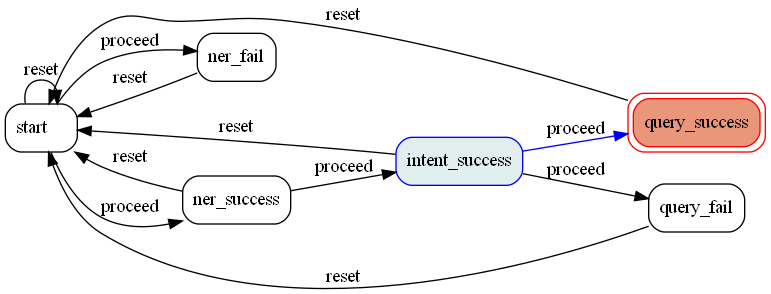

Реализуйте агента для ответов на вопросы по кино. Логика работы агента должна быть следующая:
* начинает в состоянии start;
* при вызове метода `proceed` в состоянии `start` вызывает `find_entity`, переходит в состояние `ner_success` и сохраняет найденное значение в виде атрибута `self.entity`, если сущность найдена, и переходит в `ner_fail` в противном случае;
* при вызове метода `proceed` в состоянии `ner_success` вызывает `find_intent`, переходит в состояние `intent_success` и сохраняет найденное значение в виде атрибута `self.intent`;
* при вызове метода `proceed` в состоянии `intent_success` вызывает `find_answer`, переходит в состояние `query_success` и сохраняет найденное значение в виде атрибута `self.answer`, если сущность найдена, и переходит в `query_fail` в противном случае;
* при вызове метода `reset` в любом состоянии переход в начальное состояние с сбрасывает значения атрибутов `self.entity`, `self.intent` и `self.answer`.

Если `find_entity` возвращает пустой результат или `score` меньше 0.3, то считайте, что сущность не найдена. Если find_answer возвращает score меньше 50, то считайте, что сущность не найдена.

Продемонстрируйте примеры работы агента.

- [ ] Проверено на семинаре

In [ ]:
pip install transitions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.7/96.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
from transitions import Machine

Конструктор Machine

```
Machine(
    model,          # модель, к которой добавляются состояния и переходы
    states,         # список состояний (строки или объекты State)
    transitions=None,  # список переходов (см. ниже)
    initial=None,   # начальное состояние
    auto_transitions=False # не создавать автогенерируемые методы
    ...
)
```


метод add_transition

```
add_transition(
    trigger,     # имя метода, который вызовет переход (например, 'proceed')
    source,      # из какого состояния возможен переход
    dest,        # в какое состояние переход
    conditions=None,  # функция/список функций, возвращающих True → переход разрешён
    unless=None,      # функция/список функций, возвращающих False → переход разрешён
    before=None,      # вызывается ДО перехода
    after=None,       # вызывается ПОСЛЕ перехода
)
```

то есть когда мы ходим, чтобы прошел на следующий этап при получении ответа, мы используем conditions, а когда мы хотим сделать переход при неудачном результате, то используем unless (получаем false и тогда он идет в dest)

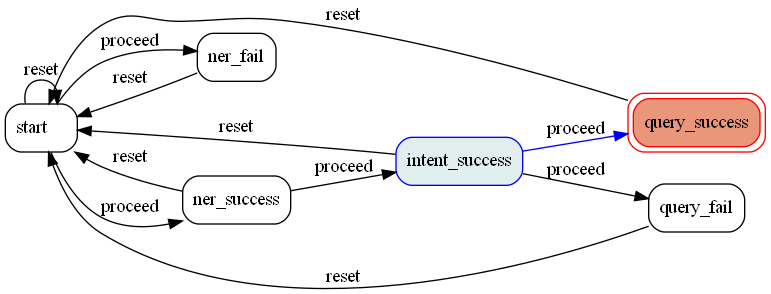


**proceed**
- [x] start - ner_success
- [x] start - ner_fail
- [x] ner_success - intent_success
- [x] intent_success - query_fail
- [x] intent_success - query_success

если мы нашли: то должны вывести результат и ресетнуть данные

**reset**
- [x] ner_fail, query_fail, query_success - start


**Вопрос**

внутри transitions.Machine функции conditions, unless проверяется до before
поэтому не успевает получить результаты из before для проверки

поэтому придется объединить два действия в unless\conditions там где они есть

In [ ]:
class SearchAnswer():
    def __init__(self, get_entity, get_intent, find_answer, db):
        self.get_entity = get_entity
        self.get_intent = get_intent
        self.find_answer = find_answer
        self.db = db

        self.reset_attempts = 0
        self.give_up = False

        states = [
            'start',
            'ner_fail',
            'ner_success',
            'intent_success',
            'query_fail',
            'query_success'
        ]

        self.need_to_reset = [
            'ner_fail',
            'query_fail',
            'query_success'
        ]

        self.machine = Machine(
            model = self,
            states = states,
            initial = 'start',
            auto_transitions=False
        )

        self.entity = None
        self.entity_score = None
        self.intent = None
        self.answer = None
        self.answer_score = None
        self.question = None
        self.bool_answer = False


        # ---- PROCEED ----

        # start - ner_success
        self.machine.add_transition(
            trigger=    'proceed',
            source=     'start',
            dest=       'ner_success',
            #prepare до проверки condition работает, а before после проверки

                                        # use get entity -> update entity +score
            conditions= 'func_entity',  # entity score > 0.3 -> True
        )

        # start - ner_fail
        self.machine.add_transition(
            trigger=    'proceed',
            source=     'start',
            dest=       'ner_fail',

                                        # use get entity -> update entity +score
            unless=     'func_entity',  # entity score > 0.3 -> False
        )

        # ner_success - intent_success
        self.machine.add_transition(
            trigger=    'proceed',
            source=     'ner_success',
            dest=       'intent_success',
            before=     'func_intent', # get intent
        )

        # intent_success - query_fail
        self.machine.add_transition(
            trigger=    'proceed',
            source=     'intent_success',
            dest=       'query_fail',
            unless=     'func_answer',  # answer score > 50 -> False
                                        # use find answer -> update answer+score
        )

        # intent_success - query_success
        self.machine.add_transition(
            trigger=    'proceed',
            source=     'intent_success',
            dest=       'query_success',
            conditions= 'func_answer',  # answer score > 50 -> True
                                        # use find answer -> update answer+score
        )


        # ---- RESET ----

        # ner_fail - start
        self.machine.add_transition(
            trigger=    'reset',
            source=     'ner_fail',
            dest=       'start',
            after=      'make_reset' # check count of resets, after delete atributes
        )

        # query_fail - start
        self.machine.add_transition(
            trigger=    'reset',
            source=     'query_fail',
            dest=       'start',
            after=      'make_reset' # check count of resets, after delete atributes
        )


        # оказалось бесполезным при доработке класса

        # query_success - start
        # self.machine.add_transition(
        #     trigger=    'reset',
        #     source=     'query_success',
        #     dest=       'start',
        #     before=     'get_result', # need return atributes before
        #     after=      'make_reset' # after delete atributes
        # )

        # ---- UPDATE ----

        self.machine.add_transition(
            trigger=    'update',
            source=     '*',
            dest=       'start',
            after=      'full_reset' # after delete atributes
        )


    def func_entity(self, _):
        entity = self.get_entity(self.question)
        self.entity = entity['word']
        self.entity_score = entity['score']
        return self.entity_score >= 0.3

    # ---------------

    def func_intent(self, _):
        self.intent = self.get_intent(self.question)

    # ---------------

    def func_answer(self, _):
        answer = self.find_answer(self.entity, self.intent, db)
        self.answer = answer[0]
        self.answer_score = answer[1]
        return self.answer_score >= 50

    # ----------------

    def make_reset(self):
        self.reset_attempts += 1
        if self.reset_attempts > 3:
            self.give_up = True
        self.entity = None
        self.entity_score = None
        self.intent = None
        self.answer = None
        self.answer_score = None
        self.bool_answer = False

    def full_reset(self):
        self.make_reset()
        self.reset_attempts = 0

    # ----------------

    def get_result(self):
        print('----------------------------------------------')
        print('question:', self.question)
        print('film:', self.entity)
        print('post:', self.intent)
        print(f'Answer: {self.answer}; score: {self.answer_score}')
        print('----------------------------------------------')
        self.bool_answer = True

    # ----------------

    def safe_proceed(self, question):
        self.update()
        self.question = question
        while not self.give_up:


            if self.state in self.need_to_reset:
                self.reset()
            else:
                self.proceed(question)

            if self.state == 'query_success':
                self.get_result()
                break

        if not self.bool_answer:
            print('Конечный результат не найден')
            self.get_result()

        if self.give_up:
            print("Лимит перезапусков, модель не получила результата")


In [ ]:
q, get_entity(q)

('Организатор съемок художественного произведения Тобол',
 {'score': 1.0, 'word': 'Тобол'})

In [ ]:
get_intent(q)

'film_director'

In [ ]:
find_answer(get_entity(q)['word'], get_intent(q), db)

('Игорь Зайцев', 100)

In [ ]:
result_model = SearchAnswer(get_entity, get_intent, find_answer, db)

In [ ]:
result_model.safe_proceed(q)

----------------------------------------------
question: Организатор съемок художественного произведения Тобол
film: Тобол
post: film_director
Answer: Игорь Зайцев; score: 100
----------------------------------------------


In [ ]:
shuffled = questions
shuffle(shuffled)
for q in shuffled[:5]:
    result_model.safe_proceed(q)
    print()

----------------------------------------------
question: Кто был продюсером 11
film: 11
post: film_director
Answer: Даррен Аронофски (Darren Aronofsky); score: 100
----------------------------------------------

----------------------------------------------
question: Кто продюсировал фильм Однажды в Марселе
film: Однажды в Марселе
post: film_director
Answer: Жюльен Локайр (Julien Leclercq); score: 100
----------------------------------------------

----------------------------------------------
question: Как зовут продюсера фильма Драйв
film: Драйв
post: film_director
Answer: Николас Виндинг Рефн (Nicolas Winding Refn); score: 100
----------------------------------------------

----------------------------------------------
question: Кто продюсер фильма В метре друг от друга
film: В метре друг от друга
post: film_director
Answer: Джастин Болдони (Justin Baldoni); score: 100
----------------------------------------------

----------------------------------------------
question: Как зов